## CSCS530 Winter 2015
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2015)

  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2015
  * Schedule: Wednesdays and Friday, 1:00-2:30PM ET
  * Location: 120 West Hall (http://www.lsa.umich.edu/cscs/research/computerlab)
  * Teachers: [Mike Bommarito](https://www.linkedin.com/in/bommarito) and [Sarah Cherng](https://www.linkedin.com/pub/sarah-cherng/35/1b7/316)

#### [View this repository on NBViewer](http://nbviewer.ipython.org/github/mjbommar/cscs-530-w2016/tree/master/)


# Buffon's Needle

 One of the first "modern" simulations ever performed was Buffon's needle (and subsequent correction by Laplace).  This simulation was devised as a physical means of estimating $\pi$, and is reasonably accurate with simple measurement tools and a small number of samples.
 
 Many of the visual elements of this notebook were inspired by this wonderful book:
 https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Buffons_Needle_Sim.ipynb

In [1]:
%matplotlib inline

# Imports
import numpy
import numpy.random
import matplotlib.pyplot as plt

import seaborn
seaborn.set_style("darkgrid")

In [4]:
# Draw center, angle, calculate start/end points for length
def sample_line(length=0.5):
    # Draw center
    xC, yC = numpy.random.random(2)
    
    # Draw angle
    theta = numpy.random.uniform(0, numpy.pi)
    
    # Get endpoints
    x0 = xC - (0.5 * length) * numpy.cos(theta)
    x1 = xC + (0.5 * length) * numpy.cos(theta)
    y0 = yC - (0.5 * length) * numpy.sin(theta)
    y1 = yC + (0.5 * length) * numpy.sin(theta)
    
    return x0, x1, y0, y1

In [6]:
def is_unit(z):
    return (0 < z < 1)

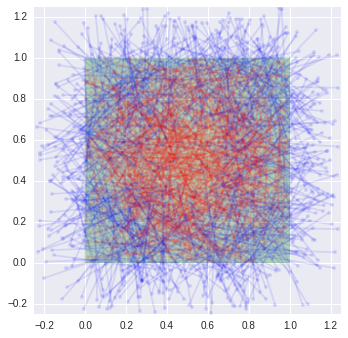

In [87]:
N = 1000

# Setup plot
f, ax = plt.subplots()
ax.set_xlim((-0.25, 1.25))
ax.set_ylim((-0.25, 1.25))
ax.set_aspect('equal')

# Drop needles
count_in = 0
count_out = 0
for i in range(N):
    x0, x1, y0, y1 = sample_line()
    if all(map(is_unit, [x0, x1, y0, y1])):
        ax.add_line(plt.Line2D([x0, x1], [y0, y1], alpha=0.1, marker="o", markersize=4, color="red"))
        count_in += 1
    else:
        ax.add_line(plt.Line2D([x0, x1], [y0, y1], alpha=0.1, marker="o", markersize=4, color="blue"))
        count_out += 1
        
# Draw box around unit square
ax.add_patch(plt.Rectangle((0, 0), 1, 1, alpha=0.25, color="green"))

In [88]:
p_cut = float(count_out) / (count_in + count_out)
print("In/out: {0}/{1}".format(count_in, count_out))
print("P(out): {0}".format(p_cut))

In/out: 464/536
P(out): 0.536


In [133]:
# Theoretical cut
(1 - numpy.power(1 - 2 * length / numpy.pi, 2))

0.53529858872524372

In [89]:
estimate = (2 * length) / (1 - numpy.sqrt(1 - p_cut))
print("Estimate: {0}".format(estimate))

Estimate: 3.13652137059


Estimate: 3.08495083802


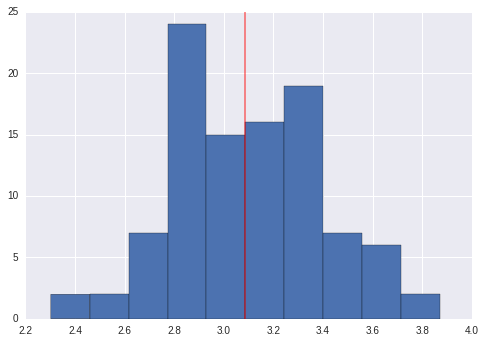

In [138]:
def run_simulation(samples=100, simulations=100):
    # Run sims
    length = 0.5
    
    # Iterate over each sim
    pi_estimates = []
    for n in range(simulations):
        # Drop needles
        count_in = 0
        count_out = 0
        for i in range(samples):
            x0, x1, y0, y1 = sample_line()
            if all(map(is_unit, [x0, x1, y0, y1])):
                count_in += 1
            else:
                count_out += 1

        # Calculate cut probability
        p_cut = float(count_out) / (count_in + count_out)
        
        # Calculate estimate
        estimate = (2 * length) / (1 - numpy.sqrt(1 - p_cut))
        pi_estimates.append(estimate)
    
    return pi_estimates

pi_estimates = run_simulation()
_ = plt.hist(pi_estimates)
plt.axvline(numpy.mean(pi_estimates), color="red", alpha=0.5)
print("Estimate: {0}".format(numpy.mean(pi_estimates)))